In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,sys,time

In [2]:
#projects = ["Kidney", "Lung", "Breast", "Brain", "PRAD", 
#            "Colorectal", "Gastric", "HNSC",
#            "CESC", "PAAD", "TransNEO-Breast", "NCI-Brain"]

projects = ["KIRC", "KIRP", "KICH", "LUSC", "LUAD", "BRCA", "LGG",
            "PRAD", "HNSC", "COAD", "STAD", "READ", "CESC", 
            "ESCA", "PAAD", "GBM", "TransNEO-Breast", "NCI-Brain"]

#projects = ["Kidney", "Lung"]
print(len(projects))
analysis_results = "analysis_results/"

18


In [3]:
#xlabel = ["TCGA-KIRC", "TCGA-KIRP", "TCGA-Lung", "TCGA-Breast", "TCGA-Brain", "TCGA-Prostate",
#          "TCGA-Colorectal", "TCGA-Gastric", "TCGA-Head&Neck",
#            "TCGA-Cervical", "TCGA-Pancreas", "TransNEO-Breast", "NCI-Brain"]
xlabel = projects

KIRC 627
KIRP 1066
KICH 352
LUSC 89
LUAD 541
BRCA 1688
LGG 1366
PRAD 927
HNSC 842
COAD 827
STAD 1016
READ 2554
CESC 613
ESCA 1998
PAAD 705
GBM 327
TransNEO-Breast 1404
NCI-Brain 1740


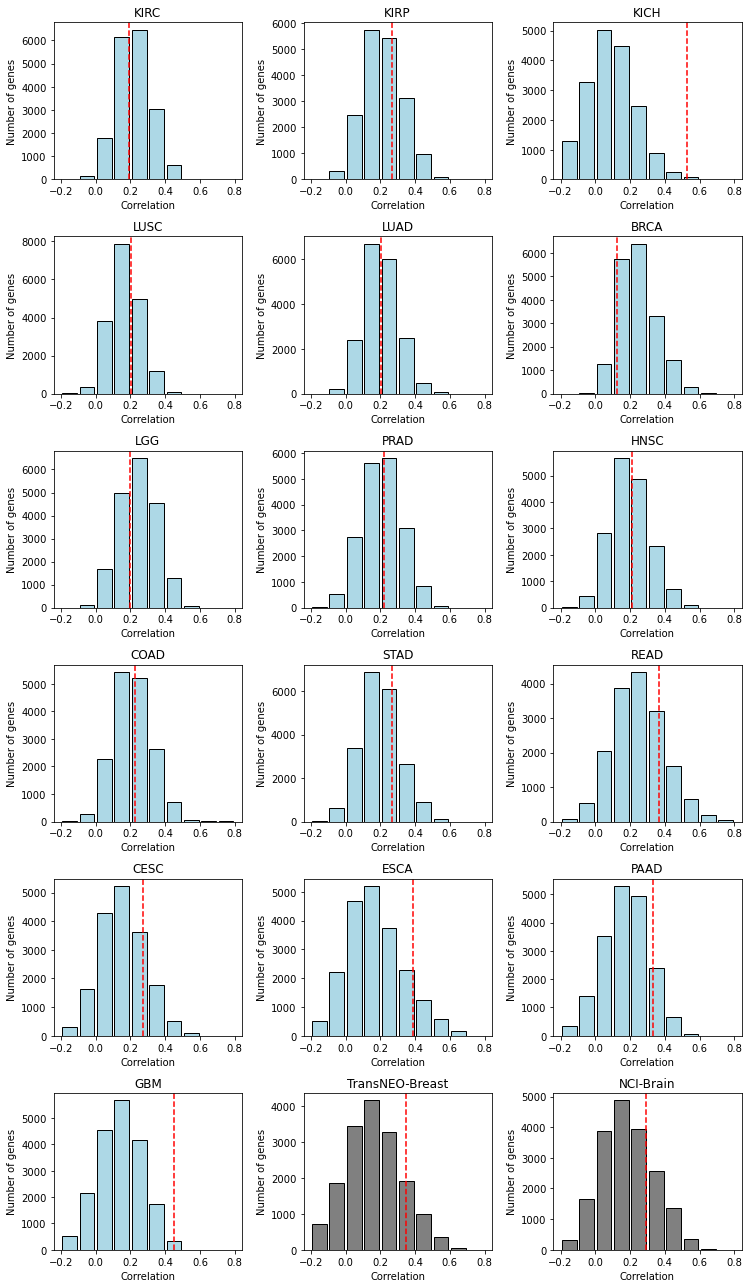

In [12]:
nx,ny = 3,6
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*3))

bins1 = np.linspace(-0.2,0.8,11, endpoint=True)

ip = 0
for j in range(ny):
    for i in range(nx):
    
        project = projects[ip]

        df_padj = pd.read_csv(f"{analysis_results}/{project}_R_sorted.csv")

        coef = df_padj["coef"].values
        p_adj = df_padj["p_adj"].values

        print(project, sum(coef > 0.4))
        
        
        ## find coef_min with p_adj < 0.05:
        i_gene = p_adj < 0.05
        R0 = coef[i_gene]
        R0_min = np.min(R0)

        if ip < 16:
            ax[j,i].hist(coef,bins=bins1,histtype='bar',color="lightblue",edgecolor="black",rwidth=0.85)
        else:
            ax[j,i].hist(coef,bins=bins1,histtype='bar',color="gray",edgecolor="black",rwidth=0.85)

        ax[j,i].axvline(x=R0_min, ls = "--", color='red', label="p-adj=0.05")

        ax[j,i].set_xlabel("Correlation")
        ax[j,i].set_ylabel("Number of genes")
        
        ax[j,i].set_title(f"{xlabel[ip]}")

        #ax[0].plot([R0_min, R0_min],[0,50000], "--", color="red", label="p-adj=0.05")
        #ax[0].set_xticks([-0.2,0,0.2,0.4,0.6,0.8])
        
        #ax[0].set_yticks([1000,2000,3000,4000,5000,6000])
        #ax[0].legend()

        #ax[1].plot(coef0,n, "o--", label="DeepPT")
        #ax[1].set_xlabel("Correlation threshold")
        #ax[1].set_ylabel("Number of sites")
        #ax[1].plot(0.4,786, "^", label="HE2RNA")

        ip += 1
    
        #ax[j,i].set_ylim(0,6000)
    
#ax[0,0].set_ylim(0,5000)
#ax[0,1].set_ylim(0,6500)
#ax[0,2].set_ylim(0,6500)

#ax[2,0].set_ylim(0,7000)

#ax[3,1].set_ylim(0,4500)
#ax[3,2].set_ylim(0,5500)

#ax[1].legend()
plt.tight_layout(h_pad=1, w_pad= 1.5)
plt.savefig("hist_16TCGA.pdf", format='pdf', dpi=50)